<a href="https://colab.research.google.com/github/Genullz/Stroke-Prediction/blob/main/02_Core_Project_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the Packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')

Load the Dataset

In [4]:
path = ('/content/drive/MyDrive/Data Science Bootcamp/Core Project 02/healthcare-dataset-stroke-data.csv')
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
# Check for Missing Values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Address inconsistent Values

In [8]:
# Change the age column from an object to an integer
df['age'] = df['age'].astype(float)

In [9]:
# encoding the smoking status column
df['smoking_status'].replace({'Unknown':0, 'smokes':1, 'formerly smoked':2, 'never smoked':3}, inplace=True)

In [10]:
# encoding the residence type column
df['Residence_type'].replace({'Rural': 0, 'Urban': 1}, inplace=True)

In [11]:
# encoding the work type column
df['work_type'].replace({'children': 0, 'Self-employed': 1, 'Private': 2, 'Govt_job': 3, 'Never_worked': 4}, inplace=True)

In [12]:
# encoding the gender column
df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}, inplace=True)

In [13]:
# encoding the ever_married column
df['ever_married'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [14]:
df.dropna(subset=['bmi'], inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   int64  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   int64  
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   int64  
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.6 KB


##Prepare the dataset

In [16]:
#identify
X = df.drop(columns='stroke', axis=1)
y = df['stroke']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
#instantiate SimpleImputers with most_frequent and mean strategies
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [18]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include = 'number')

In [19]:
# make pipeline
num_pipe = make_pipeline(mean_imputer, scaler)

In [20]:
# create tuples of (imputer, selector) for each datatype
num_tuple = (num_pipe, num_selector)

In [21]:
preprocessor = make_column_transformer(num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5b4a8b0e90>)])

In [22]:
# fit ColumnTransformer on the training data
preprocessor.fit(X_train, y_train)

# transform both the training and testing data (this will output a NumPy array)
X_train_imputed = preprocessor.transform(X_train)
X_test_imputed = preprocessor.transform(X_test)

In [23]:
X_train_imputed

array([[ 1.11037092, -0.82698222, -0.52064637, ..., -0.03879792,
        -1.06922118,  0.29069877],
       [ 1.34266975,  1.2064991 , -1.81017863, ..., -0.9564555 ,
         0.07450419, -1.29457851],
       [ 1.12139223, -0.82698222,  0.76888589, ...,  0.20472213,
         0.19016181, -0.50193987],
       ...,
       [ 1.28638068, -0.82698222,  0.45761948, ..., -0.32993867,
        -0.86360763,  0.29069877],
       [-1.38413346, -0.82698222, -1.40997896, ..., -0.26539118,
        -1.03066864, -1.29457851],
       [ 1.44559833,  1.2064991 ,  0.90228578, ..., -1.07088059,
        -0.00260089,  0.29069877]])

##Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends

In [24]:
corr = df.corr()

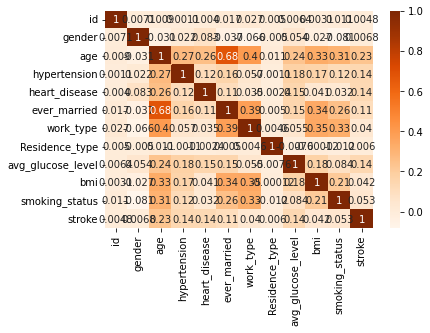

In [25]:
# the heatmap
sns.heatmap(corr, cmap = 'Oranges', annot = True);

The is a moderate correlation between a age and marital status in this dataset with value of 0.68.

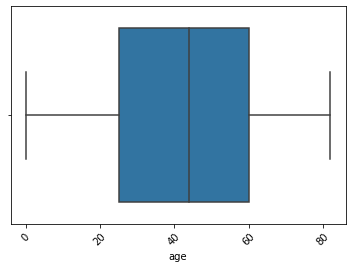

In [26]:
# boxplot
sns.boxplot(data=df, x='age');
plt.xticks(rotation = 45);

The average mean of age of the patient in our dataset is 45.

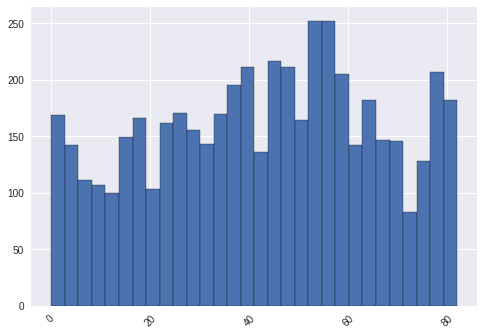

In [27]:
## patient's age
plt.style.use('seaborn')
df['age'].hist(bins = 30, edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

This Histogram shows the age range among potential stroke patients

##Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).

In [28]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))


In [29]:
# Make an instance of the model with default parameters
logreg = LogisticRegression()

In [30]:
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [31]:
#fit the model
logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.9603368649823417
0.9486970684039088


In [32]:
# Prediction
logreg_pred = logreg_pipe.predict(X_test)
logreg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# evaluate
eval_classification (logreg_pipe, X_train, X_test, y_train, y_test)

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3535
           1       0.00      0.00      0.00       146

    accuracy                           0.96      3681
   macro avg       0.48      0.50      0.49      3681
weighted avg       0.92      0.96      0.94      3681

Test Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1228
   macro avg       0.47      0.50      0.49      1228
weighted avg       0.90      0.95      0.92      1228



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Tuning hyperparameters to affect the model results.

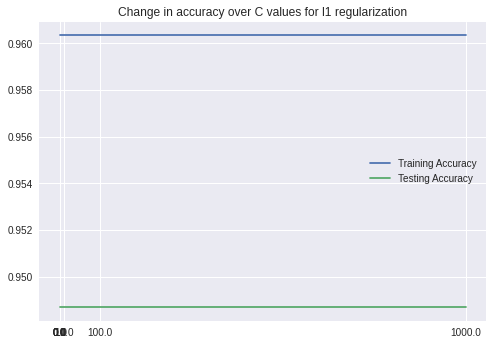

In [34]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

#iterative over the c values
for c in c_values:
# instantiate a model with each value of c and fit it on the data
  logreg = LogisticRegression (C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logreg_pipe = make_pipeline(scaler, logreg)
  logreg_pipe.fit(X_train, y_train)
# add the training and testing scores to our scores lists
  train_scores.append(logreg_pipe.score(X_train, y_train))
  test_scores.append(logreg_pipe.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

In [35]:
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.9486970684039088,
 0.001: 0.9486970684039088,
 0.01: 0.9486970684039088,
 0.1: 0.9486970684039088,
 1: 0.9486970684039088,
 10: 0.9486970684039088,
 100: 0.9486970684039088,
 1000: 0.9486970684039088}

2nd Model

In [36]:
# Make an instance of the model with default parameters
knn = KNeighborsClassifier(n_neighbors=2)

In [37]:
# look for tunable hyperparameters
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [38]:
%%time
# fitting
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

CPU times: user 13.8 ms, sys: 1.9 ms, total: 15.7 ms
Wall time: 16.2 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [39]:
# Prediction
knn_pred = knn_pipe.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

Evaluate and compare the models

In [40]:
# evaluate
eval_classification (knn_pipe, X_train, X_test, y_train, y_test)

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3535
           1       1.00      0.07      0.13       146

    accuracy                           0.96      3681
   macro avg       0.98      0.53      0.55      3681
weighted avg       0.96      0.96      0.95      3681

Test Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.25      0.02      0.03        63

    accuracy                           0.95      1228
   macro avg       0.60      0.51      0.50      1228
weighted avg       0.91      0.95      0.92      1228



Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. (We encourage you to try multiple techniques depending on your data!).

In [41]:
# Use PCA to lower the dimensions in this dataset while retaining 95% of the variance
pca = PCA(n_components = .95)

In [42]:
%%time
# Now we will build the pipeline
knn_pca_pipe = make_pipeline(scaler, pca, knn)

# fit the pipeline
knn_pca_pipe.fit(X_train, y_train)

CPU times: user 19.8 ms, sys: 5.02 ms, total: 24.8 ms
Wall time: 38.4 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [43]:
# evaluate
eval_classification (knn_pca_pipe, X_train, X_test, y_train, y_test)

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3535
           1       1.00      0.08      0.14       146

    accuracy                           0.96      3681
   macro avg       0.98      0.54      0.56      3681
weighted avg       0.96      0.96      0.95      3681

Test Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.33      0.02      0.03        63

    accuracy                           0.95      1228
   macro avg       0.64      0.51      0.50      1228
weighted avg       0.92      0.95      0.92      1228



In [44]:
# Make an instance of the model with default parameters
logreg = LogisticRegression()

In [45]:
logreg_pca_pipe = make_pipeline(scaler, pca, logreg)

In [46]:
#fit the model
logreg_pca_pipe.fit(X_train, y_train)
print(logreg_pca_pipe.score(X_train, y_train))
print(logreg_pca_pipe.score(X_test, y_test))

0.9603368649823417
0.9486970684039088


In [47]:
# Predict
logreg_pca_pred = logreg_pca_pipe.predict(X_test)
logreg_pca_pred

array([0, 0, 0, ..., 0, 0, 0])

Evaluate and compare

In [48]:
%%time
# evaluate
eval_classification (logreg_pca_pipe, X_train, X_test, y_train, y_test)

Train Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3535
           1       0.00      0.00      0.00       146

    accuracy                           0.96      3681
   macro avg       0.48      0.50      0.49      3681
weighted avg       0.92      0.96      0.94      3681

Test Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1228
   macro avg       0.47      0.50      0.49      1228
weighted avg       0.90      0.95      0.92      1228

CPU times: user 38.6 ms, sys: 27.2 ms, total: 65.8 ms
Wall time: 49.1 ms


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

for Production, the model that I will select will be the knn because it's gives us a better accuracy score.